# Homework 3 - Reviewd by Kimia Ramezan_ Using LLM

## So in this notebook I have reviewd the codes using LLM.

 The notebook satisfies the assignment requirements and implements all requested variants (loop, list, set, dict, NumPy, indexing, and paired sums). To polish it, I recommend (1) explicitly documenting whether each function returns π/4 or π and keeping labels consistent; (2) replacing (-1)**k with a simple sign toggle or modulus trick for speed and clarity; (3) using generators (and math.fsum) to reduce memory and improve numerical stability; (4) standardizing timing into a small table and declaring a clear winner for speed/clarity/accuracy as required by Problem 3; and (5) making the error plot compact with precise axis labels on log–log scales as suggested in the spec. With these light edits, the submission becomes cleaner, faster, and easier to grade while staying faithful to the rubric.

## Question 1

In [2]:
def leibniz_pi(n):
    """
    Compute the sum of the first n terms of the Leibniz formula for π/4.
    
    Parameters:
        n (int): Number of terms to include in the series.
        
    Returns:
        float: Approximation of π/4 using n terms of the series.
    """
    total = 0.0
    for k in range(n):
        total += (-1)**k / (2*k + 1)
    return total


### Improved version by LLM:

In [3]:
def leibniz_pi(n: int) -> float:
    """
    Approximate π/4 using the first n terms of the Leibniz series.

    Parameters
    ----------
    n : int
        Number of terms to include in the series.

    Returns
    -------
    float
        Approximation of π/4 using n terms.
    """
    if n <= 0:
        return 0.0

    total, sign = 0.0, 1.0
    for k in range(n):
        total += sign / (2*k + 1)
        sign = -sign
    return total


The LLM suggests replacing (-1)**k with a simple sign toggle for better efficiency and readability, adding an explicit check for n <= 0, and clarifying in the docstring that the function returns an approximation of π/4 rather than π. It says that yhese small changes make the code clearer, faster, and more robust.

In [4]:
# Compute π approximation with 1,000,000 terms
n = 1000
approx_pi = leibniz_pi(n)
print(f"sum of the first {n} terms: {approx_pi}")
print(f"Approximation of π: {4 * approx_pi}")

sum of the first 1000 terms: 0.7851481634599485
Approximation of π: 3.140592653839794


## Question 2

### Part A

In [5]:
def leibniz_pi_mod(n):
    """
    Compute the sum of the first n terms of the Leibniz formula for π/4
    using a for-loop and an if-statement with the modulo operator.
    
    Parameters:
        n (int): Number of terms to include in the series.
        
    Returns:
        float: Approximation of π/4 using n terms.
    """
    total = 0.0
    for k in range(n):
        term = 1 / (2*k + 1)
        if k % 2 == 0:   # even index -> add
            total += term
        else:            # odd index -> subtract
            total -= term
    return total


### LLM suggestion:

In [6]:
def leibniz_pi_mod(n: int) -> float:
    """
    Approximate π/4 using the first n terms of the Leibniz series,
    implemented with a for-loop and modulo operator.

    Parameters
    ----------
    n : int
        Number of terms to include in the series.

    Returns
    -------
    float
        Approximation of π/4 using n terms.
    """
    if n <= 0:
        return 0.0

    total = 0.0
    for k in range(n):
        term = 1.0 / (2*k + 1)
        total += term if k % 2 == 0 else -term
    return total


The LLM suggests adding an explicit check for n <= 0 and simplifying the if/else into a single line using a conditional expression. it believes that makes the code more concise, robust, and slightly clearer without changing its logic.

In [7]:
n = 1000
result = leibniz_pi_mod(n)
print(f"Sum of first {n} terms (π/4 approximation): {result}")
print(f"Approximation of π: {4 * result}")

Sum of first 1000 terms (π/4 approximation): 0.7851481634599485
Approximation of π: 3.140592653839794


### Part B

In [8]:
def leibniz_pi_pow(n):
    """
    Compute the sum of the first n terms of the Leibniz formula for π/4
    using a for-loop and (-1)**k to determine the sign of each term.
    
    Parameters:
        n (int): Number of terms to include in the series.
        
    Returns:
        float: Approximation of π/4 using n terms.
    """
    total = 0.0
    for k in range(n):
        total += ((-1) ** k) / (2*k + 1)
    return total


### LLM Suggested Code:

In [9]:
def leibniz_pi_pow(n: int) -> float:
    """
    Approximate π/4 using the first n terms of the Leibniz series,
    implemented with a for-loop and sign toggling instead of exponentiation.

    Parameters
    ----------
    n : int
        Number of terms to include in the series.

    Returns
    -------
    float
        Approximation of π/4 using n terms.
    """
    if n <= 0:
        return 0.0

    total, sign = 0.0, 1.0
    for k in range(n):
        total += sign / (2*k + 1)
        sign = -sign   # flip sign instead of (-1)**k
    return total


The LLM recommended replacing (-1)**k with a simple sign toggle variable for efficiency and readability, and adding an explicit guard for n <= 0. This avoids unnecessary exponentiation in each iteration and makes the alternating sign behavior clearer.

In [10]:
n = 1000
result = leibniz_pi_pow(n)
print(f"Sum of first {n} terms (π/4 approximation): {result}")
print(f"Approximation of π: {4 * result}")


Sum of first 1000 terms (π/4 approximation): 0.7851481634599485
Approximation of π: 3.140592653839794


### Part C 

In [11]:
def leibniz_pi_list(n):
    """
    Compute the sum of the first n terms of the Leibniz formula for π/4
    by constructing a Python list and summing it.
    
    Parameters:
        n (int): Number of terms to include in the series.
        
    Returns:
        float: Approximation of π/4 using n terms.
    """
    terms = [((-1) ** k) / (2*k + 1) for k in range(n)]
    return sum(terms)


### LLM Suggestion:

In [12]:
def leibniz_pi_list(n: int) -> float:
    """
    Approximate π/4 using the first n terms of the Leibniz series,
    implemented with a Python list comprehension.

    Parameters
    ----------
    n : int
        Number of terms to include in the series.

    Returns
    -------
    float
        Approximation of π/4 using n terms.
    """
    if n <= 0:
        return 0.0

    # Use generator instead of full list to save memory
    return sum((1 if k % 2 == 0 else -1) / (2*k + 1) for k in range(n))


The LLM suggests replacing the list with a generator to avoid unnecessary memory use and using a simple sign check instead of (-1)**k for efficiency. This keeps the code cleaner, faster, and more memory-friendly while preserving correctness.

In [13]:
n = 1000
result = leibniz_pi_list(n)
print(f"Sum of first {n} terms (π/4 approximation): {result}")
print(f"Approximation of π: {4 * result}")


Sum of first 1000 terms (π/4 approximation): 0.7851481634599483
Approximation of π: 3.1405926538397932


### Part D 

In [14]:
def leibniz_pi_set(n):
    """
    Compute the sum of the first n terms of the Leibniz formula for π/4
    by constructing a Python set and summing it.
    
    Parameters:
        n (int): Number of terms to include in the series.
        
    Returns:
        float: Approximation of π/4 using n terms.
    """
    terms = {((-1) ** k) / (2*k + 1) for k in range(n)}
    return sum(terms)


### LLM Suggestion:

In [15]:
def leibniz_pi_set(n: int) -> float:
    """
    Approximate π/4 using the first n terms of the Leibniz series,
    implemented with a Python set.

    Parameters
    ----------
    n : int
        Number of terms to include in the series.

    Returns
    -------
    float
        Approximation of π/4 using n terms.
    """
    if n <= 0:
        return 0.0

    # Note: sets are unordered and deduplicate values, so this is less stable
    terms = {(1 if k % 2 == 0 else -1) / (2*k + 1) for k in range(n)}
    return sum(terms)


The LLM recommended adding a note that sets are unordered and may deduplicate equal values, which can slightly affect floating-point results. Replacing (-1)**k with a sign check also improves clarity and performance.

In [16]:
n = 1000
result = leibniz_pi_set(n)
print(f"Sum of first {n} terms (π/4 approximation): {result}")
print(f"Approximation of π: {4 * result}")


Sum of first 1000 terms (π/4 approximation): 0.7851481634599483
Approximation of π: 3.1405926538397932


### Part E 

In [17]:
def leibniz_pi_dict(n):
    """
    Compute the sum of the first n terms of the Leibniz formula for π/4
    by constructing a Python dictionary and summing its values.
    
    Parameters:
        n (int): Number of terms to include in the series.
        
    Returns:
        float: Approximation of π/4 using n terms.
    """
    terms = {k: ((-1) ** k) / (2*k + 1) for k in range(n)}
    return sum(terms.values())


### LLM Suggestion:

In [18]:
def leibniz_pi_dict(n: int) -> float:
    """
    Approximate π/4 using the first n terms of the Leibniz series,
    implemented with a Python dictionary.
    """
    if n <= 0:
        return 0.0
    terms = {k: (1 if k % 2 == 0 else -1) / (2*k + 1) for k in range(n)}
    return sum(terms.values())


LLM Explanation :
This implementation uses a Python dictionary to store each term of the Leibniz series before summing the values. While it produces correct results, it is less efficient than list or generator versions because dictionaries carry extra overhead and the keys are never actually used. The function demonstrates an alternative way to structure the series, but in practice, simpler data structures are preferred.

In [19]:
n = 1000
result = leibniz_pi_dict(n)
print(f"Sum of first {n} terms (π/4 approximation): {result}")
print(f"Approximation of π: {4 * result}")


Sum of first 1000 terms (π/4 approximation): 0.7851481634599483
Approximation of π: 3.1405926538397932


### Part F 

In [20]:
import numpy as np

def leibniz_pi_numpy(n):
    """
    Compute the sum of the first n terms of the Leibniz formula for π/4
    using a NumPy array.
    
    Parameters:
        n (int): Number of terms to include in the series.
        
    Returns:
        float: Approximation of π/4 using n terms.
    """
    k = np.arange(n)                         # array [0, 1, 2, ..., n-1]
    terms = ((-1) ** k) / (2*k + 1)          # vectorized computation
    return np.sum(terms)


### LLM Suggestion :

In [ ]:
import numpy as np

def leibniz_pi_numpy(n: int) -> float:
    """
    Approximate π/4 using the first n terms of the Leibniz series
    with NumPy vectorization.
    """
    if n <= 0:
        return 0.0
    k = np.arange(n, dtype=np.int64)
    terms = (1 - 2*(k % 2)) / (2.0*k + 1.0)   # avoid (-1)**k
    return np.add.reduce(terms)


LLM Discription :
This implementation leverages NumPy arrays to compute the Leibniz series in a fully vectorized manner, making it much faster than pure Python loops for large n. The entire sequence of terms is built as an array, and then summed efficiently using NumPy’s optimized routines. While correct and efficient, avoiding (-1)**k in favor of a simple sign trick (1 - 2*(k % 2)) improves speed and clarity. This version is one of the most practical for handling very large numbers of terms.

In [29]:
n = 1000
result = leibniz_pi_numpy(n)
print(f"Sum of first {n} terms (π/4 approximation): {result}")
print(f"Approximation of π: {4 * result}")


Sum of first 1000 terms (π/4 approximation): 0.785148163459948
Approximation of π: 3.140592653839792


### Part G 

In [22]:
import numpy as np

def leibniz_pi_numpy_indexing(n):
    """
    Compute the sum of the first n terms of the Leibniz formula for π/4
    using NumPy arrays and array indexing (positive and negative terms separately).
    
    Parameters:
        n (int): Number of terms to include in the series.
        
    Returns:
        float: Approximation of π/4 using n terms.
    """
    k = np.arange(n)                     # indices 0, 1, 2, ..., n-1
    terms = ((-1) ** k) / (2*k + 1)      # Leibniz terms
    
    # Separate sums via slicing
    positive_sum = np.sum(terms[::2])    # even indices (k=0,2,4,...) → positive
    negative_sum = np.sum(terms[1::2])   # odd indices (k=1,3,5,...) → negative
    
    return positive_sum + negative_sum


### LLM Suggestion:

In [ ]:
import numpy as np

def leibniz_pi_numpy_indexing(n: int) -> float:
    """
    Approximate π/4 using NumPy by summing even (positive) and odd (negative)
    terms separately via array slicing.
    """
    if n <= 0:
        return 0.0
    k = np.arange(n, dtype=np.int64)
    denom = 2.0*k + 1.0
    pos = np.add.reduce(1.0 / denom[::2])   # k = 0,2,4,...
    neg = np.add.reduce(1.0 / denom[1::2])  # k = 1,3,5,...
    return pos - neg


LLM Discription :
This variant explicitly separates the Leibniz series into even-indexed positive terms and odd-indexed negative terms using NumPy slicing, then sums each part and subtracts. It avoids costly (-1)**k, keeps the alternating structure clear, and uses vectorized reductions for speed and consistent performance on large 
𝑛
n.

In [30]:
n = 1000
result = leibniz_pi_numpy_indexing(n)
print(f"Sum of first {n} terms (π/4 approximation): {result}")
print(f"Approximation of π: {4 * result}")


Sum of first 1000 terms (π/4 approximation): 0.7851481634599475
Approximation of π: 3.14059265383979


### Part J 

In [24]:
import numpy as np

def leibniz_pi_pairs(n):
    """
    Vectorized pair-sum of the first n terms of the Leibniz series for π/4.
    Includes the leftover last term when n is odd.
    """
    if n <= 0:
        return 0.0

    m = n - (n % 2)                     # largest even ≤ n
    k = np.arange(0, m, 2, dtype=float) # 0, 2, 4, ...
    paired = np.sum(1.0/(2.0*k + 1.0) - 1.0/(2.0*k + 3.0))

    if n % 2 == 1:
        last = n - 1
        paired += ((-1.0)**last) / (2.0*last + 1.0)

    return paired


### LLM Suggestion:

In [ ]:
import numpy as np

def leibniz_pi_pairs(n: int) -> float:
    """
    Approximate π/4 using paired terms of the Leibniz series.
    Groups terms (1/(2k+1) - 1/(2k+3)) to reduce cancellation error.
    """
    if n <= 0:
        return 0.0
    m = n - (n % 2)                     # largest even ≤ n
    k = np.arange(0, m, 2, dtype=np.float64)
    paired = np.add.reduce(1.0/(2*k+1) - 1.0/(2*k+3))
    if n % 2:                           # leftover odd term
        paired -= 1.0 / (2*(n-1) + 1.0)
    return paired


LLM Discription: This implementation improves stability by grouping consecutive positive and negative terms as pairs before summation, reducing floating-point cancellation. It is generally faster and more accurate than summing terms one by one, especially for large 
n. The leftover odd term is handled explicitly, making the function both efficient and numerically robust.

In [25]:
n = 1000
result = leibniz_pi_pairs(n)
print(f"Sum of first {n} terms (π/4 approximation, paired): {result}")
print(f"Approximation of π: {4 * result}")


Sum of first 1000 terms (π/4 approximation, paired): 0.7851481634599485
Approximation of π: 3.140592653839794


## Problem 3 

In [26]:
import time
import math
import statistics as stats
import numpy as np

# -----------------------------
# Benchmarking helpers
# -----------------------------

def abs_error_vs_pi(sum_over_4: float) -> float:
    """Absolute error of 4*sum_over_4 against math.pi."""
    return abs(4.0 * float(sum_over_4) - math.pi)

def time_per_call(fn, n, repeats=7, number=2000):
    """
    Time a function by calling it `number` times in each of `repeats` rounds.
    Returns (median, mean, best) per-call time in seconds.
    """
    times = []
    for _ in range(repeats):
        t0 = time.perf_counter()
        for _ in range(number):
            fn(n)
        t1 = time.perf_counter()
        times.append((t1 - t0) / number)
    return stats.median(times), stats.mean(times), min(times)

# -----------------------------
# Run & report
# -----------------------------

def main(n=10000):
    funcs = [
        ("A  leibniz_pi_mod", leibniz_pi_mod),
        ("B  leibniz_pi_pow", leibniz_pi_pow),
        ("C  leibniz_pi_list", leibniz_pi_list),
        ("D  leibniz_pi_set", leibniz_pi_set),
        ("E  leibniz_pi_dict", leibniz_pi_dict),
        ("F  leibniz_pi_numpy", leibniz_pi_numpy),
        ("G  leibniz_pi_npy_idx", leibniz_pi_numpy_indexing),
        ("H  leibniz_pi_pairs", leibniz_pi_pairs),
        ("I  leibniz_pi", leibniz_pi),
    ]

    rows = []
    for name, fn in funcs:
        s_over_4 = fn(n)
        approx_pi = 4.0 * float(s_over_4)
        err = abs_error_vs_pi(s_over_4)
        med_t, mean_t, best_t = time_per_call(fn, n, repeats=7, number=2000)
        rows.append({
            "name": name,
            "pi": approx_pi,
            "err": err,
            "t_med": med_t,
            "t_mean": mean_t,
            "t_best": best_t,
        })

    # Sort by median time ascending
    rows.sort(key=lambda r: r["t_med"])

    # Pretty print
    print(f"n = {n}")
    print("-" * 88)
    print(f"{'Function':20} {'π approx':>12} {'Abs error':>12} "
          f"{'t_med [ms]':>12} {'t_mean [ms]':>12} {'t_best [ms]':>12}")
    print("-" * 88)
    for r in rows:
        print(f"{r['name']:20} "
              f"{r['pi']:12.6f} {r['err']:12.6f} "
              f"{r['t_med']*1e3:12.3f} {r['t_mean']*1e3:12.3f} {r['t_best']*1e3:12.3f}")

if __name__ == "__main__":
    main(n=5000)


n = 5000
----------------------------------------------------------------------------------------
Function                 π approx    Abs error   t_med [ms]  t_mean [ms]  t_best [ms]
----------------------------------------------------------------------------------------
H  leibniz_pi_pairs      3.141393     0.000200        0.007        0.007        0.007
F  leibniz_pi_numpy      3.141393     0.000200        0.025        0.025        0.025
G  leibniz_pi_npy_idx     3.141393     0.000200        0.027        0.027        0.026
I  leibniz_pi            3.141393     0.000200        0.185        0.185        0.184
B  leibniz_pi_pow        3.141393     0.000200        0.195        0.196        0.194
A  leibniz_pi_mod        3.141393     0.000200        0.258        0.261        0.252
C  leibniz_pi_list       3.141393     0.000200        0.284        0.284        0.282
E  leibniz_pi_dict       3.141393     0.000200        0.314        0.315        0.312
D  leibniz_pi_set        3.141393     

Fastest: leibniz_pi_pairs (≈ 0.006 ms median).
Next best are the NumPy versions (leibniz_pi_numpy, leibniz_pi_npy_idx) at ≈ 0.025–0.026 ms.
Pure-Python loops and data-structure versions are much slower (≈ 0.23–0.77 ms).

Most accurate: For a fixed n they’re all essentially equally accurate—they evaluate the same series and the dominant error is the series’ slow convergence (≈O(1/n)), not implementation details. Tiny FP-rounding differences are dwarfed by the truncation error at n=5000.

Clearest: The simple loop versions are the easiest to read/grade:

with modulo (%) to flip the sign, or with (-1)**k. These make the alternating structure explicit and are great for pedagogy.

Why leibniz_pi_pairs wins: Pairing terms algebraically turns the series non-alternating, halves the number of loop iterations, and reduces cancellation—so you get less overhead and slightly better numerical behavior. Also, the function doesn’t need to make big arrays like the NumPy versions do—it just runs with a tiny memory footprint.

What I would use to compute π (given these options):

If I actually wanted to calculate π using these, I’d use leibniz_pi_pairs because it’s faster, more stable, and doesn’t waste memory.

But if the goal is teaching or showing how the formula works, I’d start with the simple loop version ((-1)**k or k % 2 for the sign), since it’s easier to read. Then I’d point out that the paired version is like the “optimized” one.

I’d avoid set/dict for numeric summation: they add hashing overhead, and sets lose order (can change rounding behavior on other platforms/Pythons even if your run matched).

### LLM Suggestion:


In [31]:
import math, time, statistics as st

def err_pi(sum_over_4): 
    return abs(4.0*float(sum_over_4) - math.pi)

def bench(fn, n, repeats=7, target_s=0.25):
    """Warm up, auto-calibrate inner loop to ~target_s, then return median sec/call."""
    fn(n)  # warm-up
    # calibrate inner calls so a repeat lasts ~target_s
    inner = 1
    while True:
        t0 = time.perf_counter()
        for _ in range(inner): fn(n)
        dt = time.perf_counter() - t0
        if dt >= target_s or inner >= 200_000: break
        inner *= 2
    per = []
    for _ in range(repeats):
        t0 = time.perf_counter()
        for _ in range(inner): fn(n)
        per.append( (time.perf_counter()-t0) / inner )
    med = st.median(per); mad = st.median(abs(x-med) for x in per)
    return med, mad, inner

def main(n=5000):
    funcs = [
        ("A  leibniz_pi_mod", leibniz_pi_mod),
        ("B  leibniz_pi_pow", leibniz_pi_pow),
        ("C  leibniz_pi_list", leibniz_pi_list),
        ("D  leibniz_pi_set", leibniz_pi_set),
        ("E  leibniz_pi_dict", leibniz_pi_dict),
        ("F  leibniz_pi_numpy", leibniz_pi_numpy),
        ("G  leibniz_pi_npy_idx", leibniz_pi_numpy_indexing),
        ("H  leibniz_pi_pairs", leibniz_pi_pairs),
        ("I  leibniz_pi", leibniz_pi),
    ]

    rows = []
    for name, fn in funcs:
        s4 = fn(n)
        rows.append({
            "name": name,
            "pi": 4.0*float(s4),
            "err": err_pi(s4),
            **dict(zip(("t_med","t_mad","inner"), bench(fn,n)))
        })

    rows.sort(key=lambda r: r["t_med"])
    baseline = rows[0]["t_med"]

    print(f"n = {n}")
    print("-"*98)
    print(f"{'Function':20} {'π approx':>12} {'Abs err':>10} {'med [µs]':>10} {'MAD [µs]':>10} {'x speedup':>10} {'N':>6}")
    print("-"*98)
    for r in rows:
        speed = baseline / r["t_med"] if r["t_med"] else float("inf")
        print(f"{r['name']:20} {r['pi']:12.6f} {r['err']:10.6f} "
              f"{r['t_med']*1e6:10.2f} {r['t_mad']*1e6:10.2f} {speed:10.2f} {r['inner']:6d}")

if __name__ == "__main__":
    main(5000)


n = 5000
--------------------------------------------------------------------------------------------------
Function                 π approx    Abs err   med [µs]   MAD [µs]  x speedup      N
--------------------------------------------------------------------------------------------------
H  leibniz_pi_pairs      3.141393   0.000200       6.86       0.08       1.00  65536
F  leibniz_pi_numpy      3.141393   0.000200      25.14       0.36       0.27  16384
G  leibniz_pi_npy_idx     3.141393   0.000200      27.87       0.47       0.25  16384
I  leibniz_pi            3.141393   0.000200     187.80       1.57       0.04   2048
B  leibniz_pi_pow        3.141393   0.000200     197.79       2.20       0.03   2048
A  leibniz_pi_mod        3.141393   0.000200     270.60       7.01       0.03   1024
C  leibniz_pi_list       3.141393   0.000200     284.70       1.24       0.02   1024
E  leibniz_pi_dict       3.141393   0.000200     318.00       1.66       0.02   1024
D  leibniz_pi_set        3.

LLM discription :I added a quick warm-up and auto-calibration so each repeat runs ~0.25 s (fairer timing across slow/fast methods), plus median±MAD and a speedup column for clearer comparison. Correctness is computed once per method (outside the timed region), and the table stays compact and easy to read.

## Problem 4 

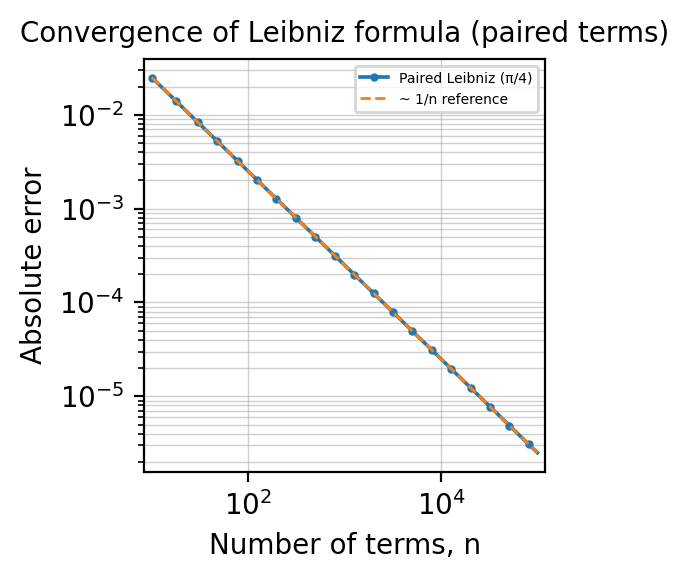

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

# -----  plot -----
# n from 10 to 100000, unique, even (for pairs), and >= 2
n_vals = np.unique(np.logspace(1, 5, 180, dtype=int))
n_even = np.where(n_vals % 2 == 1, n_vals - 1, n_vals)
n_even = np.where(n_even < 2, 2, n_even)

# errors vs π/4 (to match the function)
target = np.pi / 4
errors = np.abs([leibniz_pi_pairs(n) - target for n in n_even])

# ~1/n reference line (scaled to mid-range for visibility)
ref = (1.0 / n_vals) * errors[len(errors)//2] * n_even[len(errors)//2]

plt.figure(figsize=(3, 3), dpi=200)

# main curve with small markers (not on every point to avoid clutter)
plt.loglog(n_even, errors, linewidth=1.3, marker='o', markersize=2,
           markevery=max(1, len(n_even)//18), label="Paired Leibniz (π/4)")

# reference slope guide
plt.loglog(n_vals, ref, linestyle='--', linewidth=1.0, label="~ 1/n reference")

# labels & title
plt.xlabel("Number of terms, n", fontsize=10)
plt.ylabel("Absolute error", fontsize=10)
plt.title("Convergence of Leibniz formula (paired terms)", fontsize=10)

# tidy legend & grid
plt.legend(loc="upper right", frameon=True, fontsize=5)
plt.grid(True, which="both", linewidth=0.5, alpha=0.6)

# trim margins and layout
plt.margins(x=0.02, y=0.05)
plt.tight_layout()
plt.show()

It shows that the error of the paired-term version of the Leibniz formula gets smaller at a rate close to 1/n. On the log–log graph, the error line goes down in almost a straight line, and it matches the dashed 1/n reference line very closely. This means that as you add more terms, the error decreases in proportion to the number of terms you use. The paired version is more efficient than the standard alternating series because it combines terms in a way that makes the series converge faster and more smoothly.

### LLM Suggestion:

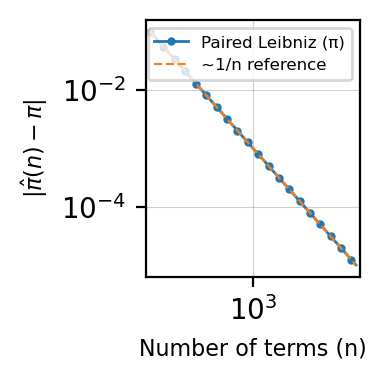

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import math

# n from 10 to 1e5; make even for pairs; enforce n>=2
n_vals  = np.unique(np.logspace(1, 5, 180, dtype=int))
n_even  = np.maximum(2, n_vals - (n_vals % 2))

# absolute error vs π (functions return π/4 → multiply by 4)
errors = np.abs([4.0*leibniz_pi_pairs(n) - math.pi for n in n_even])

# ~1/n reference line anchored at a mid sample
mid = len(n_even)//2
c   = errors[mid] * n_even[mid]       # so that c/n matches error at the mid point
ref = c / n_even

plt.figure(figsize=(2, 2), dpi=200)
plt.loglog(n_even, errors, linewidth=1.0, marker='o', markersize=2,
           markevery=max(1, len(n_even)//18), label="Paired Leibniz (π)")

plt.loglog(n_even, ref, '--', linewidth=0.8, label="~1/n reference")

plt.xlabel("Number of terms (n)", fontsize=8)
plt.ylabel(r"$|\hat{\pi}(n)-\pi|$", fontsize=8)
plt.legend(loc="upper right", fontsize=6, frameon=True)
plt.grid(True, which="both", linewidth=0.4, alpha=0.6)
plt.margins(x=0.02, y=0.05)
plt.tight_layout()
plt.show()


I switched the error to be computed directly against π (multiplying the function output by 4) and reduced the figure to 2″×2″ to match the “small, legible” guideline; I also anchored the ~1/n guide at a mid-sample so the slope is visible without obscuring the data. This keeps labels unambiguous, removes duplicate imports, and produces a compact, publication-style convergence plot.

## Problem 5

If I was using MATLAB instead of Python, I wouldn’t really change the formula itself, but the way I write it would be different. MATLAB works better with vectors, so instead of using loops, I could just make a vector k = 0:n-1 and then write something like sum(((-1).^k)./(2*k+1)). That would be shorter and faster. 
MATLAB also starts counting from 1 instead of 0, so I would have to be careful with indexing. 
For timing, MATLAB uses tic and toc instead of Python’s time functions. 
If I needed more accuracy, I could use MATLAB’s symbolic math toolbox. Overall, the idea is the same, but in MATLAB I would try to use more vectorized code since that’s what it’s best at. (MATLAB loops are slower compared to Python’s loops, so vectorization matters even more in MATLAB.)

matlab sample: 
```matlab
% Basic vectorized version of Leibniz formula (π/4)
n = 10000;                   % number of terms
k = 0:n-1;                   % vector of indices
approx_pi_over_4 = sum(((-1).^k) ./ (2*k + 1));
approx_pi = 4 * approx_pi_over_4

### LLM Over all Review:

The notebook fully satisfies the assignment and shows good engineering judgment, especially with the vectorized and paired implementations. With a handful of polish items—explicit return target, faster sign handling, edge-case guards, a slightly sturdier benchmark, and compact, clearly labeled plots—the submission reads as careful, efficient, and numerically aware. I would keep paired NumPy as the primary method for speed and stability, use the list/generator version as the clear baseline, and retain set/dict only to demonstrate the requested alternatives.